In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-05-08 11:12:34--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.6’

insurance.csv.6     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-05-08 11:12:34 (4.64 MB/s) - ‘insurance.csv.6’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
len(dataset)

1338

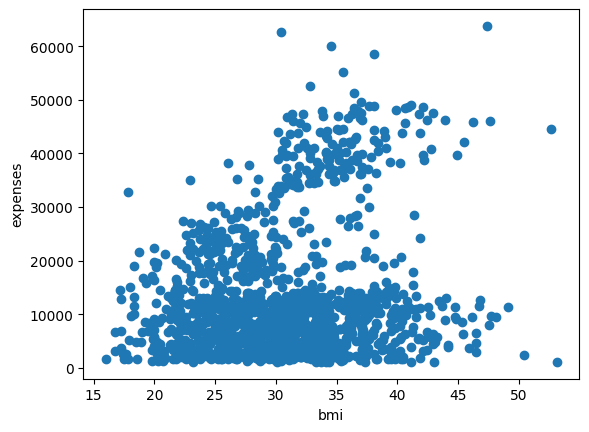

In [4]:
plt.scatter(dataset["bmi"], dataset["expenses"])
plt.xlabel("bmi")
plt.ylabel("expenses")
plt.show()

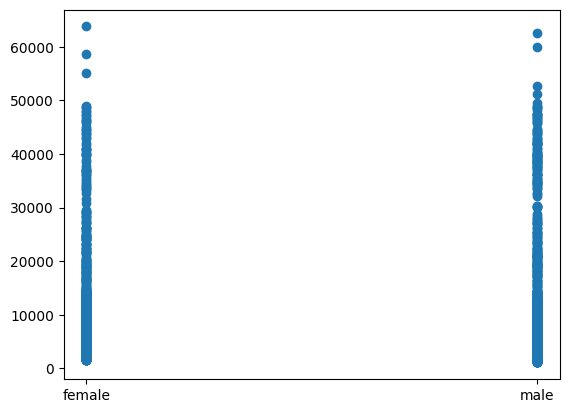

In [5]:
plt.scatter(dataset["sex"],dataset["expenses"])
plt.show()

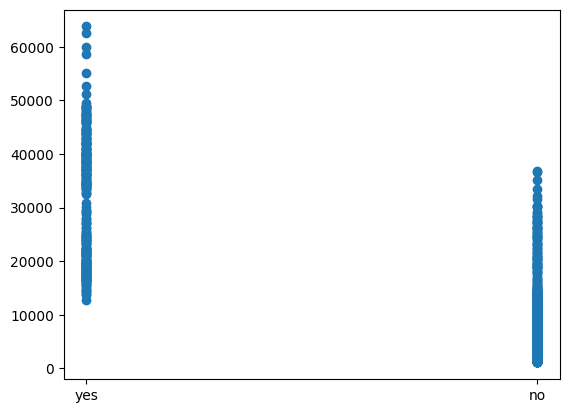

In [6]:
plt.scatter(dataset["smoker"],dataset["expenses"])
plt.show()

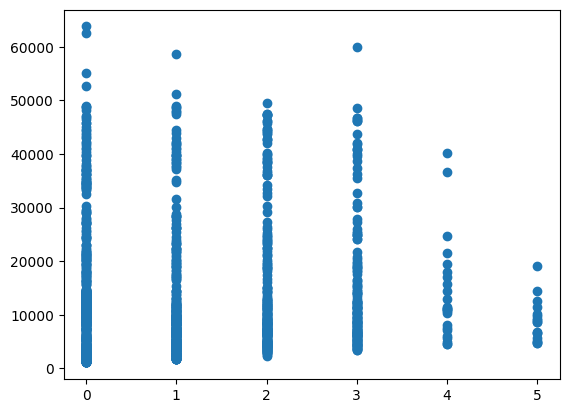

In [7]:
plt.scatter(dataset["children"],dataset["expenses"])
plt.show()

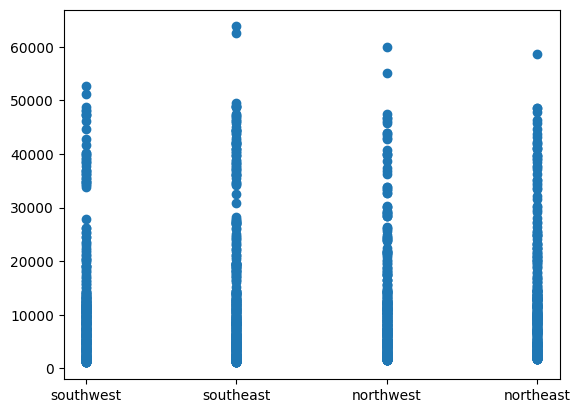

In [8]:
plt.scatter(dataset["region"],dataset["expenses"])
plt.show()

In [9]:
train_dataset = dataset.sample(frac = 0.8)
test_dataset = dataset.drop(train_dataset.index)


In [10]:
print(len(train_dataset))

1070


In [11]:
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")
train_labels.head()

454      4686.39
601      9174.14
1123    18903.49
1077     2102.26
7        7281.51
Name: expenses, dtype: float64

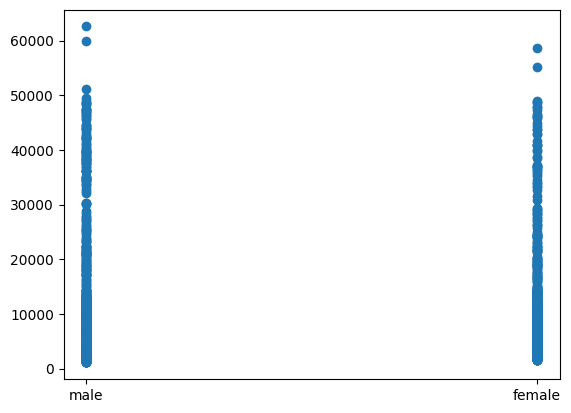

In [12]:
plt.scatter(train_dataset["sex"],train_labels)
plt.show()

In [13]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
454,32,male,46.5,2,no,southeast
601,51,male,31.6,0,no,northwest
1123,27,female,32.4,1,no,northeast
1077,21,male,26.0,0,no,northeast
7,37,female,27.7,3,no,northwest


In [14]:
categorical_columns = ["sex","smoker","region"]
numerical_columns = ["age","bmi","children"]

features_columns_encoding = []
for encoding_features in categorical_columns:
  encoding = train_dataset[encoding_features].unique()
  features_columns_encoding.append(encoding)
print(features_columns_encoding)

[array(['male', 'female'], dtype=object), array(['no', 'yes'], dtype=object), array(['southeast', 'northwest', 'northeast', 'southwest'], dtype=object)]


In [15]:
def encoding_features(dataset, key):
    indice_encoding = float(0)
    features_encoding = []
    dict_features_encoding = []
    features_encoding.append(dataset[key].unique())
    for i in range(len(features_encoding[0])):
        dataset.loc[dataset[key] == features_encoding[0][i], key] = indice_encoding
        dict_features_encoding.append({features_encoding[0][i]: indice_encoding})
        indice_encoding += float(1)
    return dataset


In [16]:
encoding_features(test_dataset,"sex")
encoding_features(test_dataset,"smoker")
encoding_features(test_dataset,"region")
test_dataset.head()

,age,sex,bmi,children,smoker,region
8,37,0.0,29.8,2,0.0,0.0
23,34,1.0,31.9,1,1.0,0.0
26,63,1.0,23.1,0,0.0,0.0
30,22,0.0,35.6,0,1.0,1.0
33,63,0.0,28.3,0,0.0,2.0


In [17]:
features_test = list()
list_key = ["sex","smoker","region"]
for i in list_key:
  features_test.append(test_dataset[i].unique())
print(features_test)

[array([0.0, 1.0], dtype=object), array([0.0, 1.0], dtype=object), array([0.0, 1.0, 2.0, 3.0], dtype=object)]


In [18]:
encoding_features(train_dataset,"sex")
encoding_features(train_dataset,"smoker")
encoding_features(train_dataset,"region")
train_dataset.head()

,age,sex,bmi,children,smoker,region
454,32,0.0,46.5,2,0.0,0.0
601,51,0.0,31.6,0,0.0,1.0
1123,27,1.0,32.4,1,0.0,2.0
1077,21,0.0,26.0,0,0.0,2.0
7,37,1.0,27.7,3,0.0,1.0


In [19]:
train_dataset = np.array(train_dataset, dtype = np.float64)
test_dataset = np.array(test_dataset,dtype = np.float64)

In [20]:
from tensorflow.keras import regularizers

In [21]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))# dtype float 32 is needed because without this the array cannot be put into a tensor

model = keras.Sequential([
    normalizer,
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(4,kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(1),
])

In [22]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = "mae", metrics = ["mae","mse"])
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198
Trainable params: 185
Non-trainable params: 13
_________________________________________________________

In [29]:
model.fit(train_dataset,train_labels,epochs = 100, validation_split = 0.5)

Epoch 1/100
17/17 [==============================] - 0s 12ms/step - loss: 4687.8950 - mae: 4685.6128 - mse: 60883984.0000 - val_loss: 3617.9963 - val_mae: 3615.7190 - val_mse: 39521432.0000
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 4727.1313 - mae: 4724.8560 - mse: 61601372.0000 - val_loss: 3603.3330 - val_mae: 3601.0525 - val_mse: 39509820.0000
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 4482.4297 - mae: 4480.1567 - mse: 55959188.0000 - val_loss: 3604.8894 - val_mae: 3602.6260 - val_mse: 39568776.0000
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 4747.1631 - mae: 4744.8960 - mse: 57826844.0000 - val_loss: 3575.7068 - val_mae: 3573.4353 - val_mse: 39468624.0000
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 4717.1201 - mae: 4714.8423 - mse: 62029632.0000 - val_loss: 3565.4062 - val_mae: 3563.1260 - val_mse: 39471528.0000
Epoch 6/100
17/17 [==============================] - 0

9/9 - 0s - loss: 3387.5415 - mae: 3385.2764 - mse: 37596608.0000 - 40ms/epoch - 4ms/step
Testing set Mean Abs Error: 3385.28 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


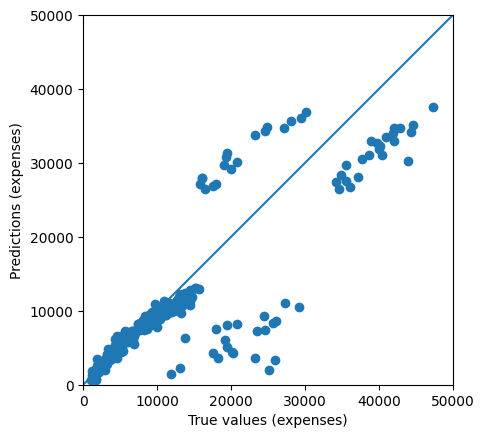

In [30]:
#RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
